In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import io

In [5]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isna().any()
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
print(df.shape)
df.info()

(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


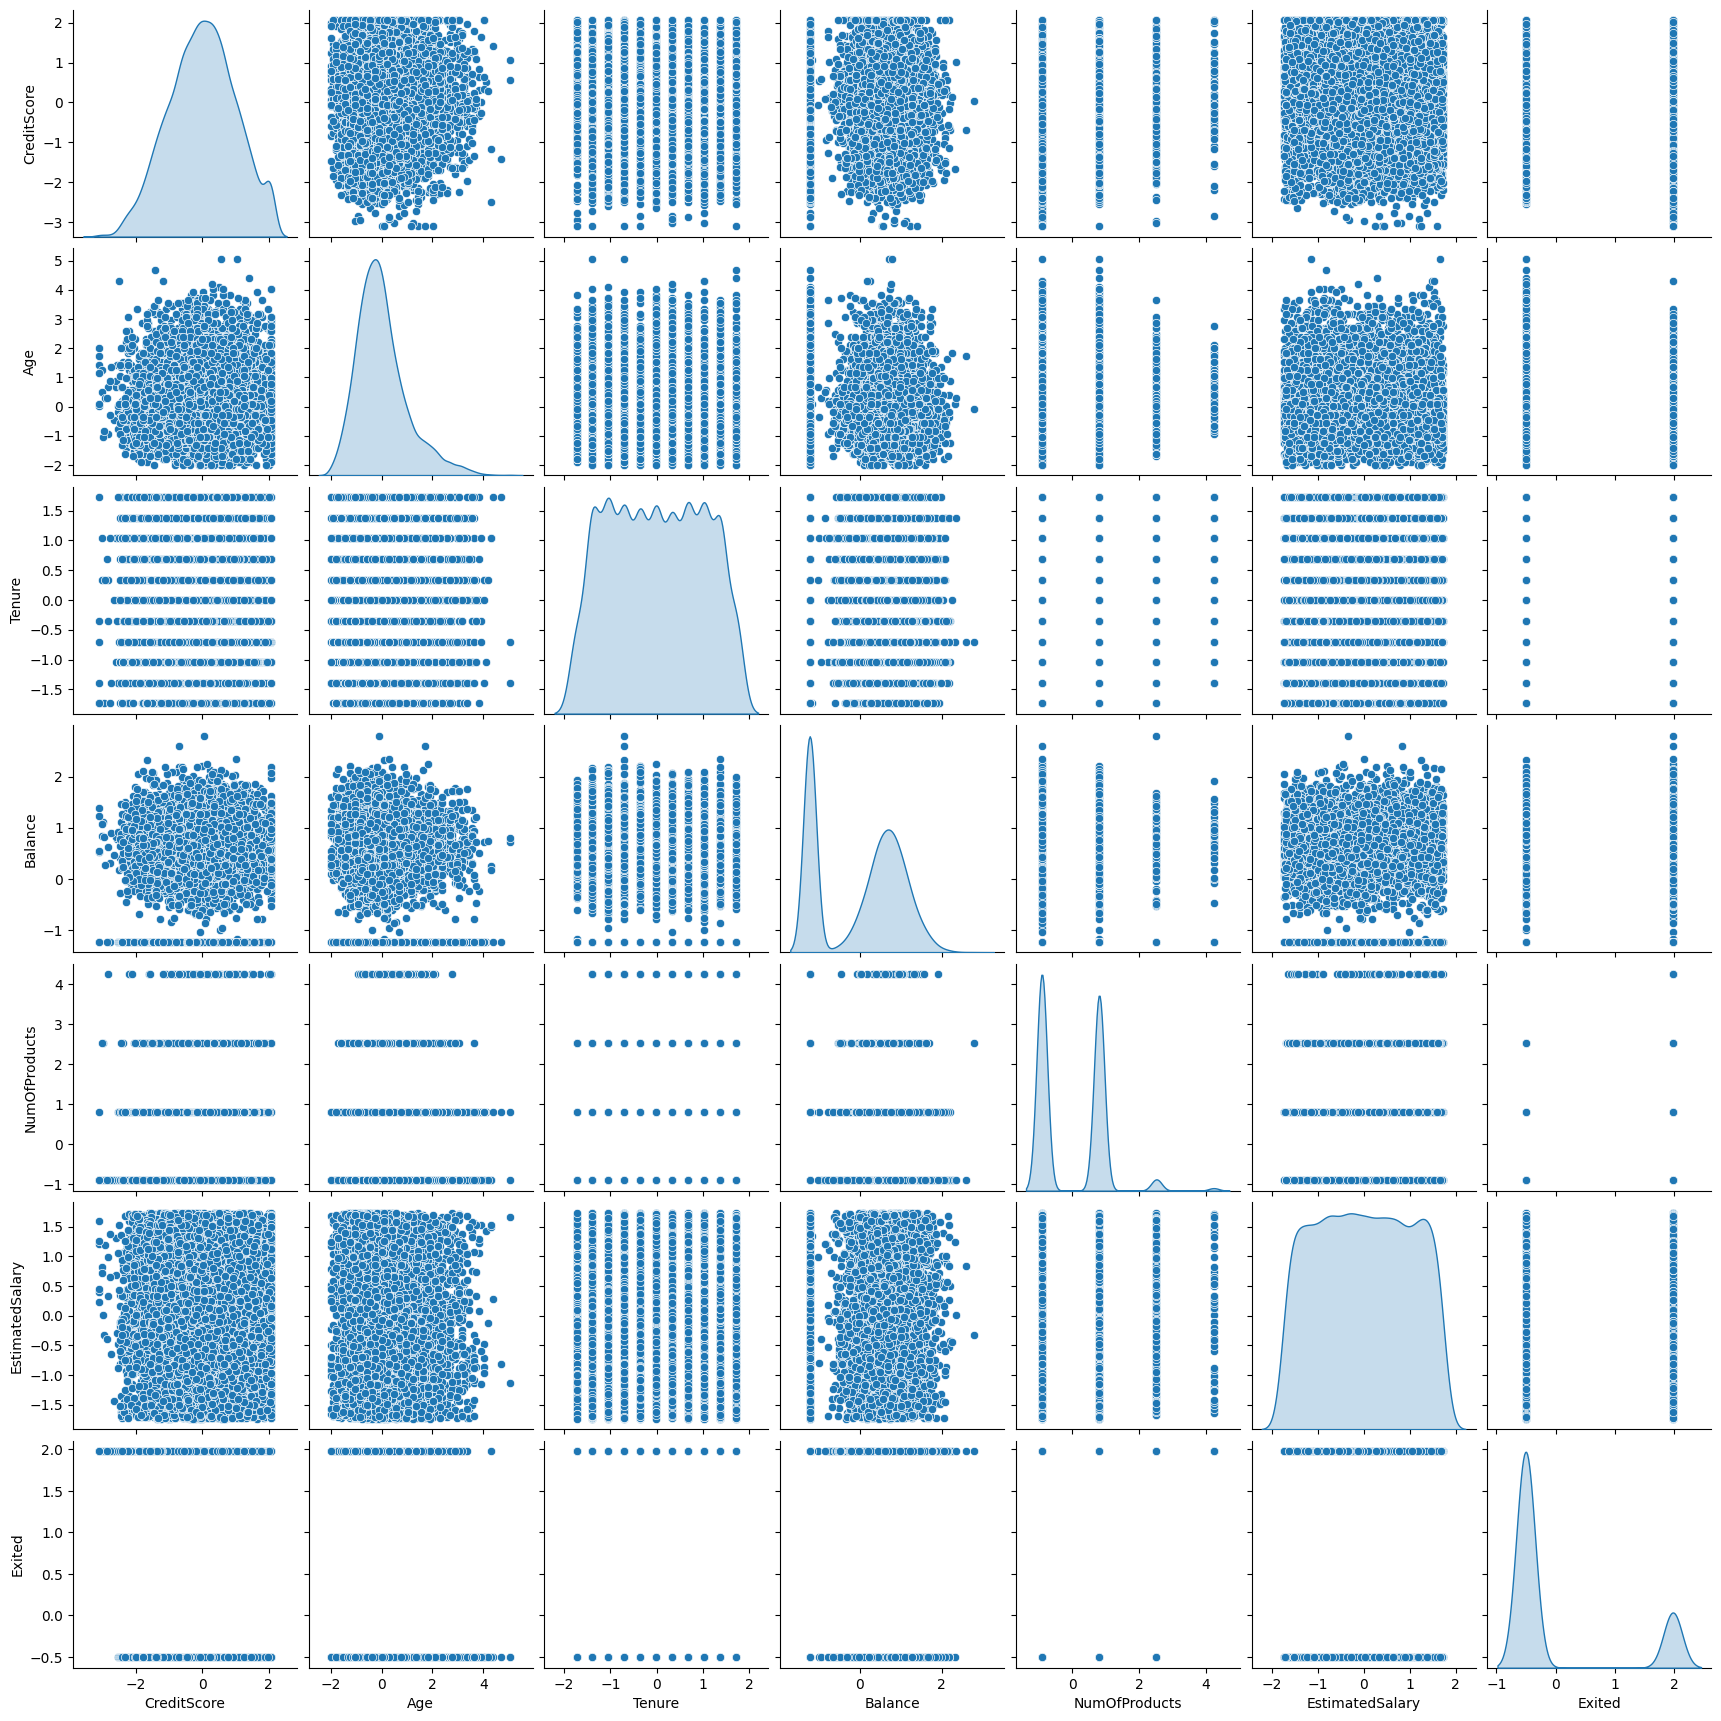

In [10]:
scaler=StandardScaler()
## Extract only the Numerical Columns to perform Bivariate Analysis
subset=df.drop(['Geography','Gender','HasCrCard','IsActiveMember'],axis=1)
scaled=scaler.fit_transform(subset)
scaled_df=pd.DataFrame(scaled,columns=subset.columns)
sns.pairplot(scaled_df,diag_kind='kde')

<Axes: >

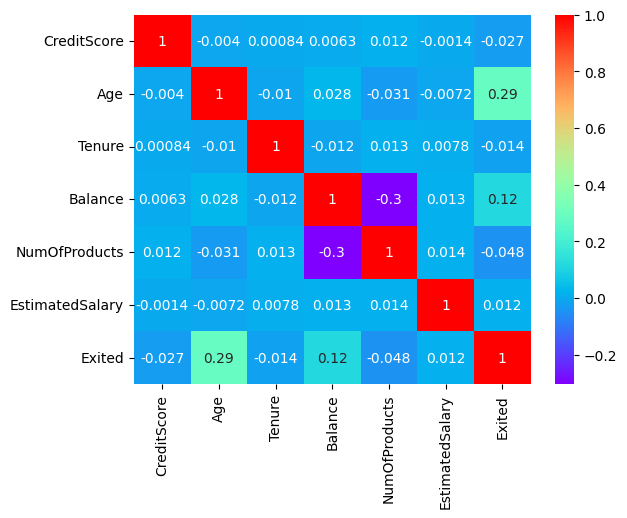

In [11]:
sns.heatmap(scaled_df.corr(),annot=True,cmap='rainbow')

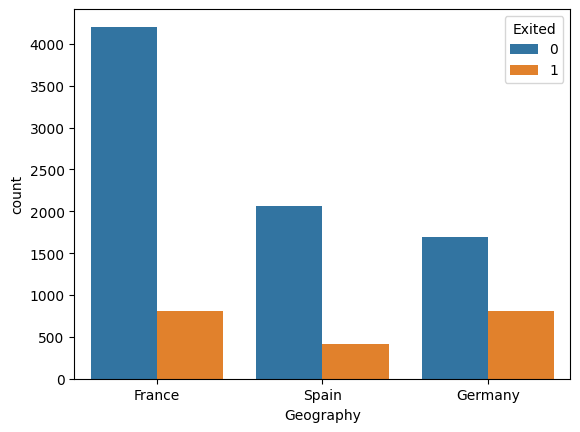

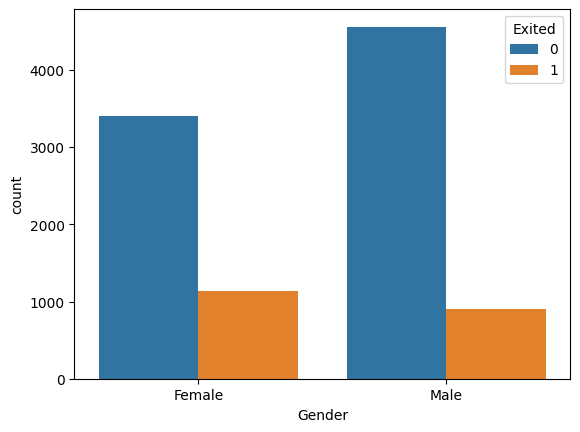

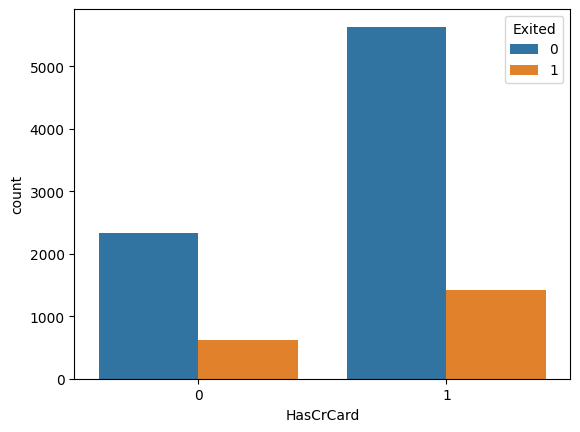

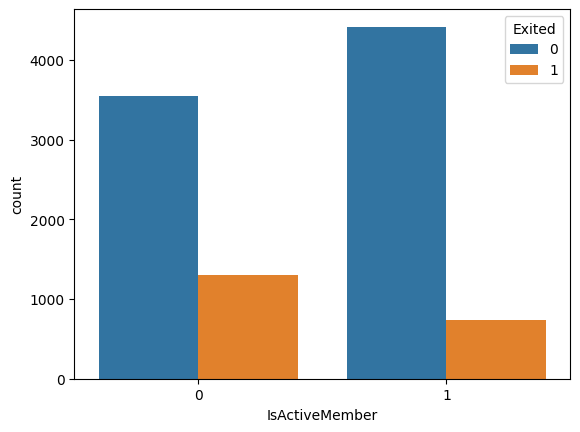

In [12]:
sns.countplot(x='Geography',data=df,hue='Exited')
plt.show()
sns.countplot(x='Gender',data=df,hue='Exited')
plt.show()
sns.countplot(x='HasCrCard',data=df,hue='Exited')
plt.show()
sns.countplot(x='IsActiveMember',data=df,hue='Exited')
plt.show()

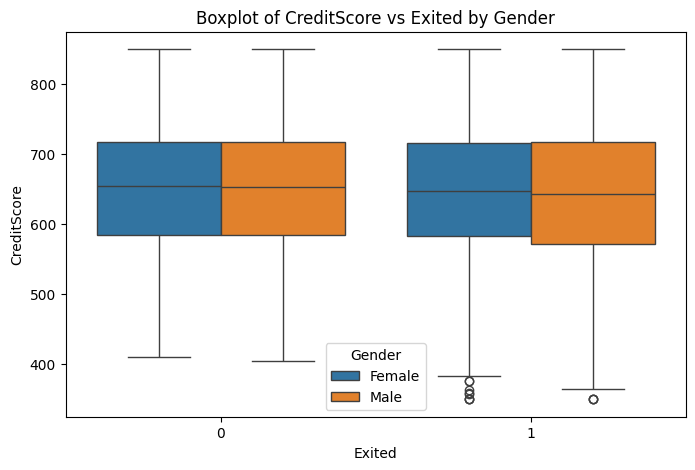

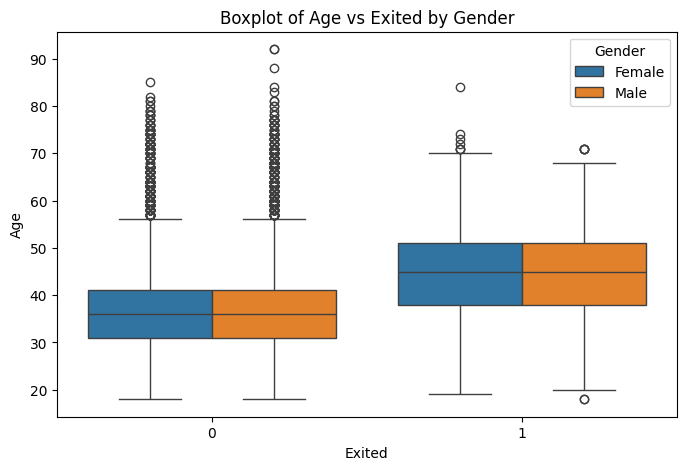

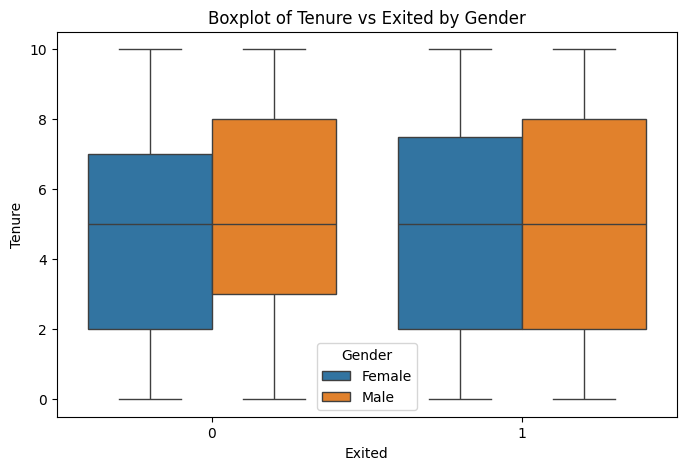

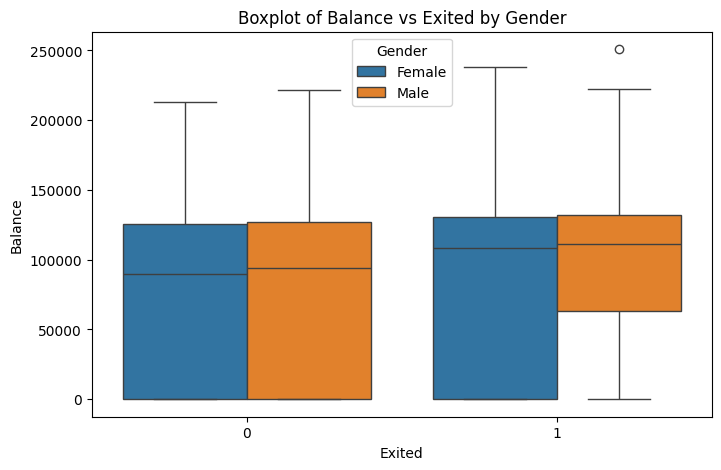

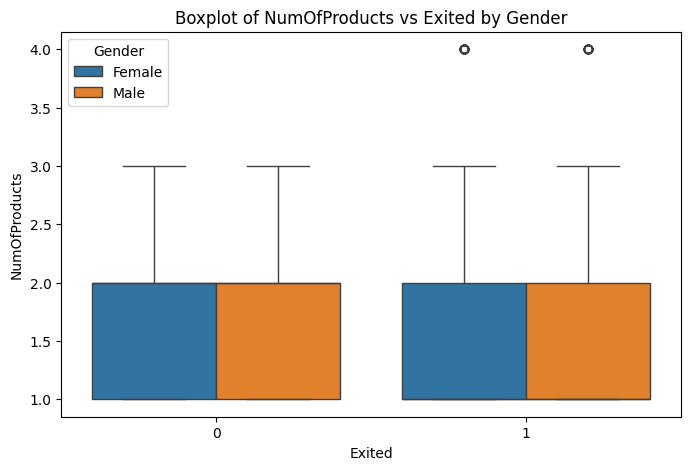

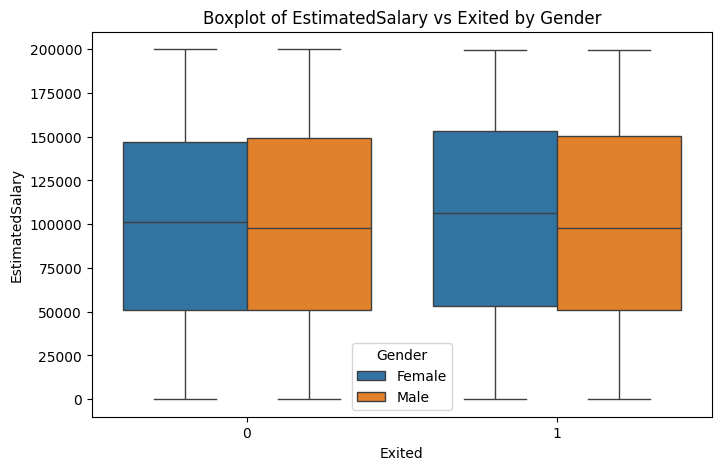

In [13]:
# Drop 'Exited' column from subset if it exists
subset = subset.drop('Exited', axis=1, errors='ignore')

# Loop through remaining columns and plot boxplots
for col in subset.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Exited', y=col, hue='Gender', data=df)
    plt.title(f'Boxplot of {col} vs Exited by Gender')
    plt.show()

In [14]:
X=df.drop('Exited',axis=1)
y=df.pop('Exited')

In [15]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)
print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))

X_train size is 8100
X_val size is 900
X_test size is 1000


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
num_subset=scaler.fit_transform(X_train[num_cols])
X_train_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_train_num_df['Geography']=list(X_train['Geography'])
X_train_num_df['Gender']=list(X_train['Gender'])
X_train_num_df['HasCrCard']=list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember']=list(X_train['IsActiveMember'])
X_train_num_df.head()
## Standardise the Validation data
num_subset=scaler.fit_transform(X_val[num_cols])
X_val_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_val_num_df['Geography']=list(X_val['Geography'])
X_val_num_df['Gender']=list(X_val['Gender'])
X_val_num_df['HasCrCard']=list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember']=list(X_val['IsActiveMember'])
## Standardise the Test data
num_subset=scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_test_num_df['Geography']=list(X_test['Geography'])
X_test_num_df['Gender']=list(X_test['Gender'])
X_test_num_df['HasCrCard']=list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember']=list(X_test['IsActiveMember'])

In [17]:
## Convert the categorical features to numerical
X_train_num_df=pd.get_dummies(X_train_num_df,columns=['Geography','Gender'])
X_test_num_df=pd.get_dummies(X_test_num_df,columns=['Geography','Gender'])
X_val_num_df=pd.get_dummies(X_val_num_df,columns=['Geography','Gender'])
X_train_num_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.178587,-1.041960,-1.732257,0.198686,0.820905,1.560315,1,1,True,False,False,False,True
1,-0.380169,-1.326982,1.730718,-0.022020,-0.907991,-0.713592,1,0,False,False,True,True,False
2,-0.349062,1.808258,-0.693364,0.681178,0.820905,-1.126515,1,0,False,True,False,True,False
3,0.625629,2.378302,-0.347067,-1.229191,0.820905,-1.682740,1,1,True,False,False,False,True
4,-0.203895,-1.136967,1.730718,0.924256,-0.907991,1.332535,1,1,False,False,True,False,True


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.fit(X_train_num_df,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8267 - loss: 0.4015
Epoch 2/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8542 - loss: 0.3561
Epoch 3/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8583 - loss: 0.3512
Epoch 4/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8589 - loss: 0.3475
Epoch 5/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.3443
Epoch 6/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8615 - loss: 0.3430
Epoch 7/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8628 - loss: 0.3401
Epoch 8/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8623 - loss: 0.3402
Epoch 9/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8628 - loss: 0.3392
Epoch 10/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8622 - loss: 0.3395
Epoch 11/100
810/810 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8620 - loss: 0.3393
Epoch 12/100
810/810 ━━━━━━━━━━━━━━━━━━━━

In [21]:
y_pred_val=model.predict(X_val_num_df)
y_pred_val[y_pred_val>0.5]=1
y_pred_val[y_pred_val <0.5]=0
y_pred_val=y_pred_val.tolist()
X_compare_val=X_val.copy()
X_compare_val['y_actual']=y_val
X_compare_val['y_pred']=y_pred_val
X_compare_val.head(10)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,y_actual,y_pred
340,642,Germany,Female,40,6,129502.49,2,0,1,86099.23,1,[0.0]
8622,706,Germany,Male,36,9,58571.18,2,1,0,40774.01,0,[0.0]
8401,535,Spain,Male,58,1,0.00,2,1,1,11779.98,1,[0.0]
4338,714,Spain,Male,25,2,0.00,1,1,1,132979.43,0,[0.0]
8915,606,France,Male,36,1,155655.46,1,1,1,192387.51,1,[0.0]
2624,605,Spain,Female,29,3,116805.82,1,0,0,4092.75,0,[0.0]
2234,720,France,Female,38,10,0.00,2,1,1,56229.72,1,[0.0]
349,582,France,Male,39,5,0.00,2,1,1,129892.93,0,[0.0]
3719,850,France,Female,62,1,124678.35,1,1,0,70916.00,1,[1.0]
2171,526,Germany,Male,58,9,190298.89,2,1,1,191263.76,0,[1.0]


In [22]:
from sklearn.metrics import confusion_matrix
cm_val=confusion_matrix(y_val,y_pred_val)
cm_val

array([[692,  24],
       [ 97,  87]])

In [23]:
Accuracy=782/900
print("Accuracy of the Model on the Validation Data set is 86.89%")
loss1,accuracy1=model.evaluate(X_train_num_df,y_train,verbose=False)
loss2,accuracy2=model.evaluate(X_val_num_df,y_val,verbose=False)
print("Train Loss {}".format(loss1))
print("Train Accuracy {}".format(accuracy1))
print("Val Loss {}".format(loss2))
print("Val Accuracy {}".format(accuracy2))

Accuracy of the Model on the Validation Data set is 86.89%
Train Loss 0.3283023536205292
Train Accuracy 0.863703727722168
Val Loss 0.34683293104171753
Val Accuracy 0.8655555844306946


In [24]:
from sklearn import metrics
y_pred_test=model.predict(X_test_num_df)
y_pred_test[y_pred_test>0.5]=1
y_pred_test[y_pred_test <0.5]=0
cm_test=metrics.confusion_matrix(y_test,y_pred_test)
cm_test
print("Test Confusion Matrix")
cm_test

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Confusion Matrix


array([[754,  40],
       [116,  90]])

In [25]:
loss3,accuracy3=model.evaluate(X_test_num_df,y_test,verbose=False)
print("Test Accuracy is {}".format(accuracy3))
print("Test loss is {}".format(loss3))

Test Accuracy is 0.843999981880188
Test loss is 0.37405142188072205
